In [8]:
import sys
import happi
import numpy as np
import scipy
import matplotlib.pyplot as plt

PATH_ALFP =  "./Arbitrary-Laser-Fields-for-PIC" # Replace with path to ALFP
PATH_SIMS = "../low_res/"  # Replace with directory of the low resolution sims
PATH_SIMS_HIGH_RES = "../high_res/"  # Replace with directory of the high resolution sims

# Replace with the directories of each respective simulation
BASE_CASE = "base_case"  # The 4 beam combination shown in main manuscript but at low resolution
NO_CHIRP = "no_chirp"
NEGATIVE_CHIRP = "negative_chirp"
J19 = "19j"
J9 = "9j"
FS60 = "60fs"
FS100J10 = "100fs10j"
UM1 = "1um"
NM400 = "400nm"
RADIAL = "radial"
GAUSSIAN_APERTURE_MATCH = "gaussian_aperture_match"
GAUSSIAN_WAIST_MATCH = "gaussian"

RADIAL_HIGH_RES = "radial"  
BEAM4_HIGH_RES = "beam4"  
GAUSSIAN_HIGH_RES = "gaussian_aperture_match" 


sys.path.insert(0, PATH_ALFP)

import os

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable

PATH_COLORMAP = "./colormap.npy"
cmap = np.load(PATH_COLORMAP)
cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

In [9]:
# Low Res Sims
S_base_case = happi.Open(PATH_SIMS + BASE_CASE, verbose=False)
S_no_chirp = happi.Open(PATH_SIMS + NO_CHIRP, verbose=False)
S_negative_chirp = happi.Open(PATH_SIMS + NEGATIVE_CHIRP, verbose=False)

S_19j = happi.Open(PATH_SIMS + J19, verbose=False)
S_9j = happi.Open(PATH_SIMS + J9, verbose=False)
S_60fs = happi.Open(PATH_SIMS + FS60, verbose=False)
S_100fs10j = happi.Open(PATH_SIMS + FS100J10, verbose=False)

S_1um = happi.Open(PATH_SIMS + UM1, verbose=False)
S_400nm = happi.Open(PATH_SIMS + NM400, verbose=False)


S_radial = happi.Open(PATH_SIMS + RADIAL, verbose=False)
S_g_ap_match = happi.Open(PATH_SIMS + GAUSSIAN_APERTURE_MATCH, verbose=False)
S_gaussian = happi.Open(PATH_SIMS + GAUSSIAN_WAIST_MATCH, verbose=False)

In [10]:
# High Res Sims
S_base_case_high_res = happi.Open(PATH_SIMS_HIGH_RES + BEAM4_HIGH_RES, verbose=False)
S_radial_high_res = happi.Open(PATH_SIMS_HIGH_RES + RADIAL_HIGH_RES, verbose=False)
S_g_ap_match_high_res = happi.Open(PATH_SIMS_HIGH_RES + GAUSSIAN_HIGH_RES, verbose=False)

### Ion Plots

In [8]:
def get_yx_plots(S, name, savefig=False, fontsize=16, is_high_res=False):
    ts_start = 3000
    ts_middle = 4500
    ts_end = 6000 
    Y_LIM = 14.4
    if is_high_res:
        ts_start = 10000
        ts_middle = 15000
        ts_end = 20000
        Y_LIM = 14.04
        
    start = np.array(S.Probe(0, "Rho_hydrogen_ions", units=['fs', 'um'], timesteps = ts_start).getData()[0])
    middle = np.array(S.Probe(0, "Rho_hydrogen_ions", units=['fs', 'um'], timesteps = ts_middle).getData()[0])
    end = np.array(S.Probe(0, "Rho_hydrogen_ions", units=['fs', 'um'], timesteps = ts_end).getData()[0])

    fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 2))

    ax[0].imshow(start.T, origin='lower', aspect='auto', vmin=0, vmax=2, cmap='jet', extent=[0, 48, -Y_LIM, Y_LIM])
    ax[0].set_yticks([-10, -5, 0, 5, 10])
    ax[0].tick_params(axis='both', which='major', labelleft=True, labelsize=fontsize)
    ax[0].set_ylim(-14.04, 14.04)
    
    ax[1].imshow(middle.T, origin='lower', aspect='auto', vmin=0, vmax=2, cmap='jet', extent=[0, 48, -Y_LIM, Y_LIM])
    ax[1].tick_params(axis='both', which='major', labelleft=False, labelsize=fontsize)
    ax[1].set_ylim(-14.04, 14.04)
    
    im = ax[2].imshow(end.T, origin='lower', aspect='auto', vmin=0, vmax=2, cmap='jet', extent=[0, 48, -Y_LIM, Y_LIM])
    ax[2].tick_params(axis='both', which='major', labelleft=False, labelsize=fontsize)
    ax[2].set_ylim(-14.04, 14.04)
    
    divider = make_axes_locatable(ax[-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(im, cax=cax, ticks=[.5, 1, 1.5])
    cbar.ax.tick_params(labelsize=12)
    fig.tight_layout(w_pad=.2)
    if savefig:
        plt.savefig(FIGURE_DATA_DIR + name + "_yx")
        plt.close()
    else:
        plt.show()
        

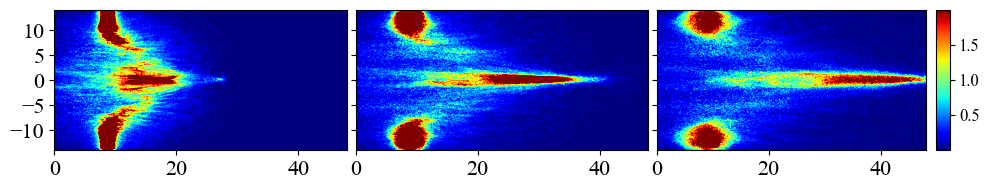

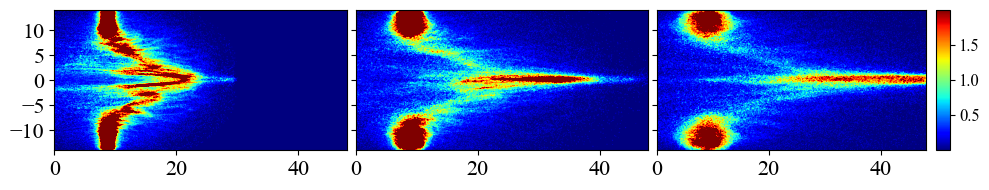

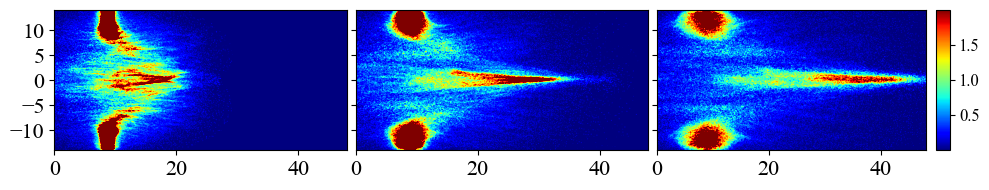

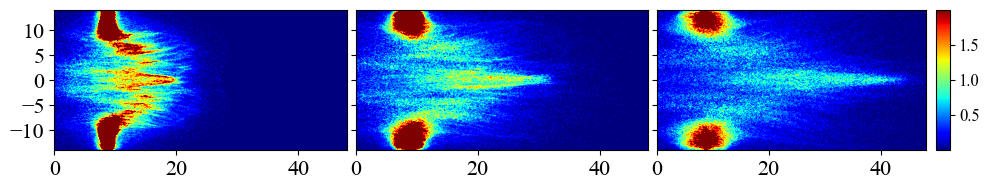

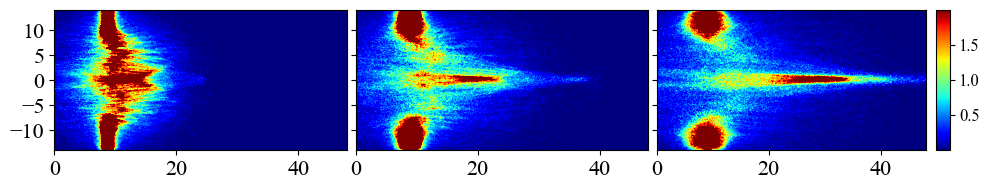

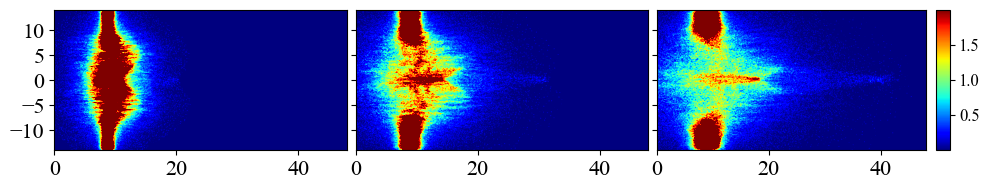

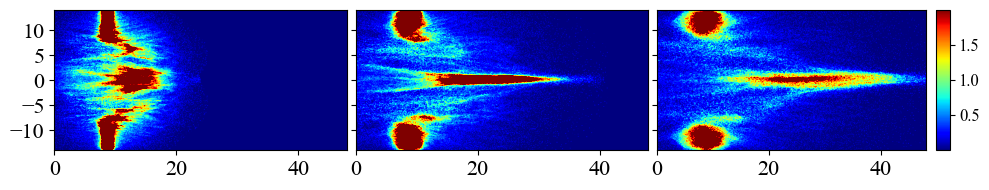

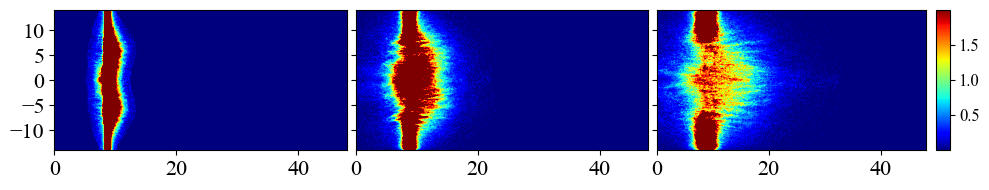

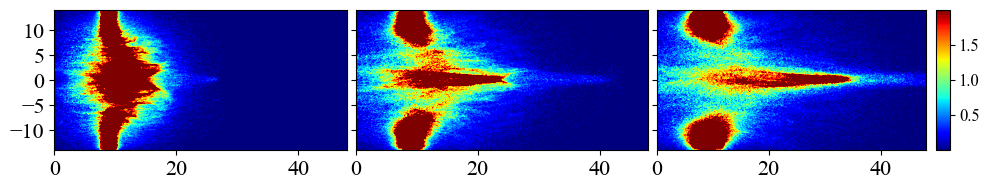

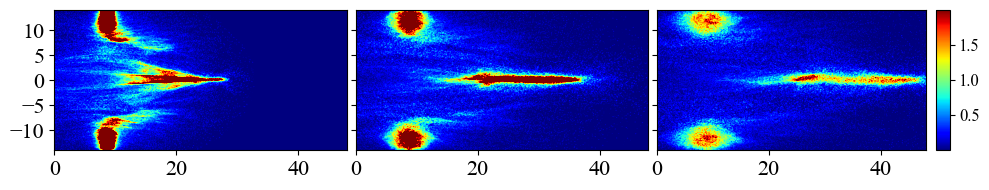

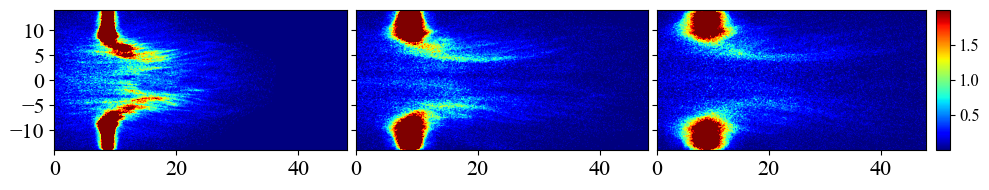

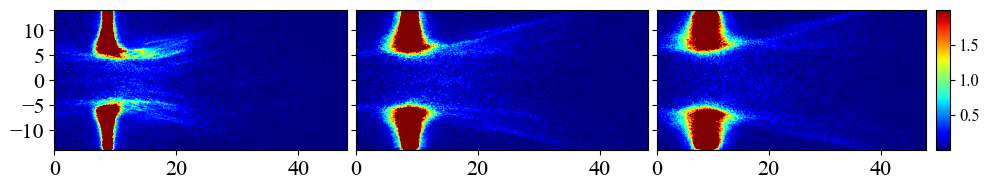

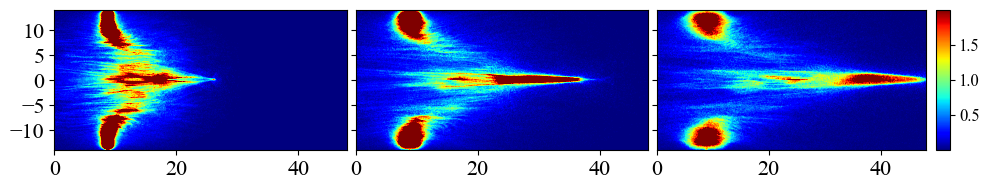

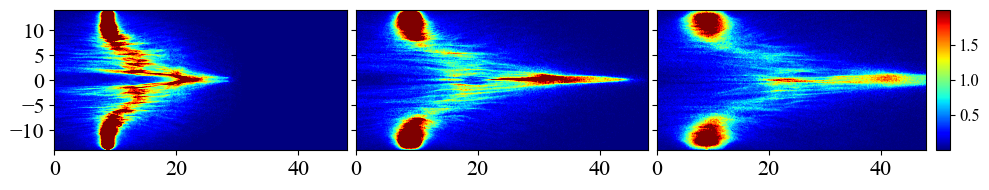

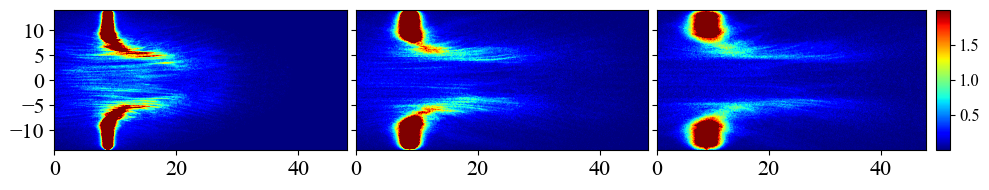

In [9]:
SAVE_FIGS = False
get_yx_plots(S_base_case, "base_case", savefig=SAVE_FIGS)
get_yx_plots(S_radial, "radial", savefig=SAVE_FIGS)
get_yx_plots(S_no_chirp, "no_chirp", savefig=SAVE_FIGS)

get_yx_plots(S_negative_chirp, "neg_chirp", savefig=SAVE_FIGS)
get_yx_plots(S_19j, "19j", savefig=SAVE_FIGS)
get_yx_plots(S_9j, "9j", savefig=SAVE_FIGS)
get_yx_plots(S_60fs, "60fs", savefig=SAVE_FIGS)
get_yx_plots(S_100fs10j, "100fs10j", savefig=SAVE_FIGS)
get_yx_plots(S_1um, "1um", savefig=SAVE_FIGS)
get_yx_plots(S_400nm, "400nm", savefig=SAVE_FIGS)
get_yx_plots(S_g_ap_match, "g_ap_match", savefig=SAVE_FIGS)
get_yx_plots(S_gaussian, "gaussian", savefig=SAVE_FIGS)


get_yx_plots(S_base_case_high_res, "base_case_high_res", savefig=SAVE_FIGS, is_high_res=True)
get_yx_plots(S_radial_high_res, "radial_high_res", savefig=SAVE_FIGS, is_high_res=True)
get_yx_plots(S_g_ap_match_high_res, "g_ap_match_high_res", savefig=SAVE_FIGS, is_high_res=True)


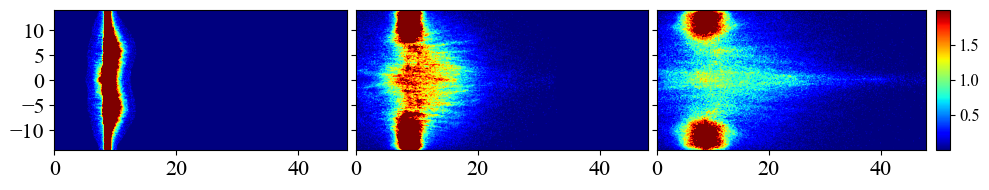

In [11]:
# Special start times for the 100 fs laser case
ts_start = 3000
ts_middle = 6000
ts_end = 9000 
Y_LIM = 14.4
fontsize = 16
start = np.array(S_100fs10j.Probe(0, "Rho_hydrogen_ions", units=['fs', 'um'], timesteps = ts_start).getData()[0])
middle = np.array(S_100fs10j.Probe(0, "Rho_hydrogen_ions", units=['fs', 'um'], timesteps = ts_middle).getData()[0])
end = np.array(S_100fs10j.Probe(0, "Rho_hydrogen_ions", units=['fs', 'um'], timesteps = ts_end).getData()[0])

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 2))

ax[0].imshow(start.T, origin='lower', aspect='auto', vmin=0, vmax=2, cmap='jet', extent=[0, 48, -Y_LIM, Y_LIM])
ax[0].set_yticks([-10, -5, 0, 5, 10])
ax[0].tick_params(axis='both', which='major', labelleft=True, labelsize=fontsize)
ax[0].set_ylim(-14.04, 14.04)

ax[1].imshow(middle.T, origin='lower', aspect='auto', vmin=0, vmax=2, cmap='jet', extent=[0, 48, -Y_LIM, Y_LIM])
ax[1].tick_params(axis='both', which='major', labelleft=False, labelsize=fontsize)
ax[1].set_ylim(-14.04, 14.04)

im = ax[2].imshow(end.T, origin='lower', aspect='auto', vmin=0, vmax=2, cmap='jet', extent=[0, 48, -Y_LIM, Y_LIM])
ax[2].tick_params(axis='both', which='major', labelleft=False, labelsize=fontsize)
ax[2].set_ylim(-14.04, 14.04)

divider = make_axes_locatable(ax[-1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax, ticks=[.5, 1, 1.5])
cbar.ax.tick_params(labelsize=12)
fig.tight_layout(w_pad=.2)

### Emittance Plots

In [13]:
def get_emittance_for_time(S, pbin_num, is_high_res=False):
    diag = S.ParticleBinning(pbin_num, units=["um", "fs", "1/cm^3"])
    timesteps = diag.getTimesteps()
    data = np.array(S.ParticleBinning(pbin_num, units=["um", "fs", "1/cm^3"]).getData())
    
    emittance_vals = np.zeros((data.shape[0]))
    lowest_emittance = 999999
    lowest_emittance_index = 0
    
    Y_LIM = 14.4
    if is_high_res:
        Y_LIM = 14.04
    for t in range(emittance_vals.size):
        normalize_div_y_data = data[t] / np.sum(data[t])

        y_axis = np.linspace(-Y_LIM, Y_LIM, normalize_div_y_data.shape[0])
        div_y_axis = np.linspace(-np.pi, np.pi, normalize_div_y_data.shape[1])

        div_y_vals = np.sum(normalize_div_y_data, axis=0)
        y_vals = np.sum(normalize_div_y_data, axis=1)

        expected_y_div_y = np.sum((normalize_div_y_data * div_y_vals) * y_vals[:, np.newaxis])

        expected_y = np.sum(y_vals * y_axis)
        expected_div_y = np.sum(div_y_vals * div_y_axis)

        expected_y_squared = np.sum(y_vals * y_axis**2)
        expected_div_y_squared = np.sum(div_y_vals * div_y_axis**2)

        emittance_vals[t] = np.sqrt(expected_div_y_squared*expected_y_squared - (expected_y_div_y**2))
        
        if lowest_emittance > emittance_vals[t] and t > 50:
            lowest_emittance = emittance_vals[t]
            lowest_emittance_index = t

    return emittance_vals, lowest_emittance, lowest_emittance_index

In [14]:
emit_radial, low_emit_radial, low_emit_radial_index = get_emittance_for_time(S_radial, 2)
emit_base_case, low_emit_base_case, low_emit_base_case_index = get_emittance_for_time(S_base_case, 2)
emit_no_chirp, low_emit_no_chirp, low_emit_no_chirp_index = get_emittance_for_time(S_no_chirp, 2)
emit_g_ap_match, low_emit_g_ap_match, low_emit_g_ap_match_index = get_emittance_for_time(S_g_ap_match, 2)
emit_gaussian, low_emit_gaussian, low_emit_gaussian_index = get_emittance_for_time(S_gaussian, 2)
emit_negative_chirp, low_emit_negative_chirp, low_emit_negative_chirp_index = get_emittance_for_time(S_negative_chirp, 2)
emit_1um, low_emit_1um, low_emit_1um_index = get_emittance_for_time(S_1um, 2)
emit_400nm, low_emit_400nm, low_emit_400nm_index = get_emittance_for_time(S_400nm, 2)
emit_19j, low_emit_19j, low_emit_19j_index = get_emittance_for_time(S_19j, 2)
emit_9j, low_emit_9j, low_emit_9j_index = get_emittance_for_time(S_9j, 2)
emit_60fs, low_emit_60fs, low_emit_60fs_index = get_emittance_for_time(S_60fs, 2)
emit_100fs10j, low_emit_100fs10j, low_emit_100fs10j_index = get_emittance_for_time(S_100fs10j, 2)


emit_radial_high_res, low_emit_radial_high_res, low_emit_radial_high_res_index = get_emittance_for_time(
    S_radial_high_res, 14, True)
emit_base_case_high_res, low_emit_base_case_high_res, low_emit_base_case_high_res_index = get_emittance_for_time(
    S_base_case_high_res, 14, True)

emit_g_ap_match_high_res, low_emit_g_ap_match_high_res, low_emit_g_ap_match_high_res_index = get_emittance_for_time(
    S_g_ap_match_high_res, 14, True)




/var/folders/wn/_6l261dd6ssfsqpqmfrs1n0w0000gn/T/ipykernel_83133/472381420.py:14: RuntimeWarning: invalid value encountered in divide
  normalize_div_y_data = data[t] / np.sum(data[t])
/var/folders/wn/_6l261dd6ssfsqpqmfrs1n0w0000gn/T/ipykernel_83133/472381420.py:30: RuntimeWarning: invalid value encountered in sqrt
  emittance_vals[t] = np.sqrt(expected_div_y_squared*expected_y_squared - (expected_y_div_y**2))


In [15]:
time_vals = np.linspace(0, 1000, emit_base_case.shape[0])
time_vals_high_res = np.linspace(0, 1000, emit_base_case_high_res.shape[0])

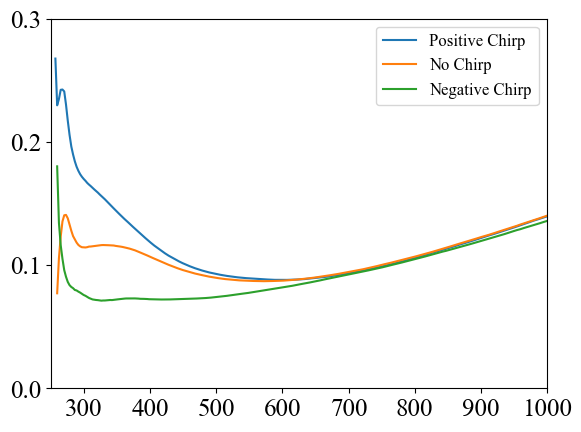

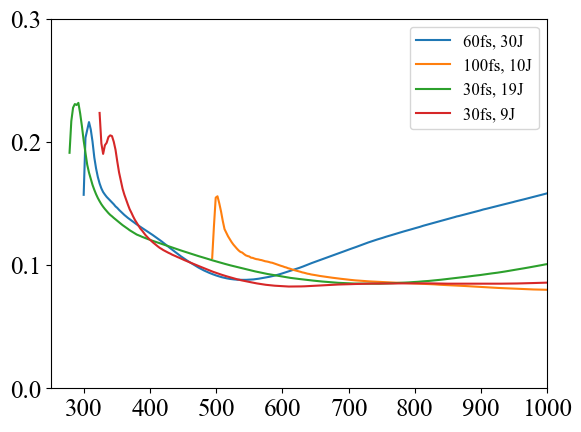

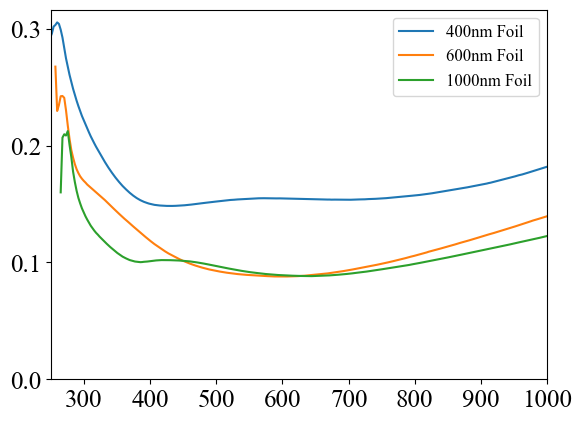

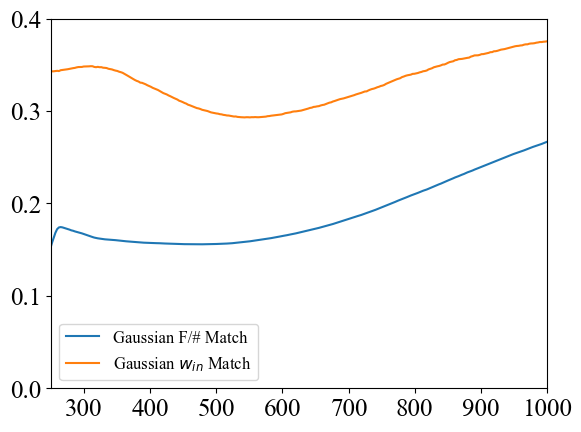

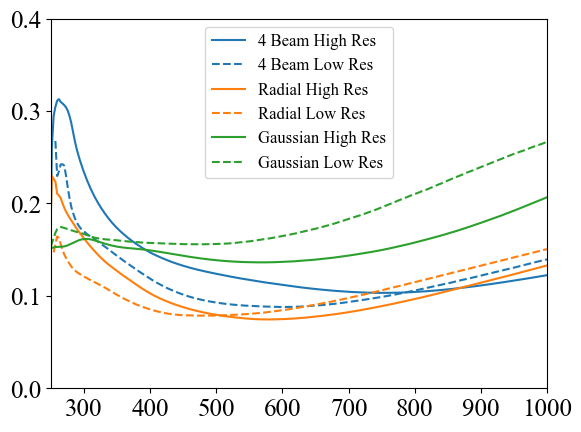

In [18]:
FONT_SIZE = 18
plt.figure()
plt.plot(time_vals, emit_base_case, label='Positive Chirp')
plt.plot(time_vals, emit_no_chirp, label='No Chirp')
plt.plot(time_vals, emit_negative_chirp, label='Negative Chirp')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, .1, .2, .3])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals, emit_60fs, label='60fs, 30J')
time_vals_1500 = np.linspace(0, 1500, emit_100fs10j.shape[0])
plt.plot(time_vals_1500, emit_100fs10j, label='100fs, 10J')
plt.plot(time_vals, emit_19j, label='30fs, 19J')
plt.plot(time_vals, emit_9j, label='30fs, 9J')

xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, .1, .2, .3])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals, emit_400nm, label='400nm Foil')
plt.plot(time_vals, emit_base_case, label='600nm Foil')
plt.plot(time_vals, emit_1um, label='1000nm Foil')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, .1, .2, .3])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals, emit_g_ap_match, label='Gaussian F/# Match')
plt.plot(time_vals, emit_gaussian, label='Gaussian $w_{in}$ Match')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, .1, .2, .3, .4])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals_high_res, emit_base_case_high_res, color='tab:blue', label='4 Beam High Res')
plt.plot(time_vals, emit_base_case, color='tab:blue', linestyle='--', label='4 Beam Low Res')

plt.plot(time_vals_high_res, emit_radial_high_res, color='tab:orange', label='Radial High Res')
plt.plot(time_vals, emit_radial, color='tab:orange', linestyle='--', label='Radial Low Res')

plt.plot(time_vals_high_res, emit_g_ap_match_high_res, color='tab:green', label='Gaussian High Res')
plt.plot(time_vals, emit_g_ap_match, color='tab:green', linestyle='--', label='Gaussian Low Res')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, .1, .2, .3, .4])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

### Density Plots

In [19]:
def get_peak_density(S):
    ions = S.Probe(0, "Rho_hydrogen_ions", units=['fs', 'um'])
    data = np.array(ions.getData())
    
    x_vals = np.linspace(0, 48, 1000)
    x_arg_20 = np.argmin(np.abs(x_vals - 20))
    
    peak_densities = np.zeros(data.shape[0])
    max_density = 0
    max_density_index = 0

    for i in range(data.shape[0]):
        peak_densities[i] = data[i, x_arg_20:, :].max()
        if peak_densities[i] > max_density:
            max_density = peak_densities[i]
            max_density_index = i
            
    
    return peak_densities, max_density, max_density_index

In [20]:
peak_radial, peak_radial_density, peak_radial_density_index = get_peak_density(S_radial)
peak_base_case, peak_base_case_density, peak_base_case_density_index = get_peak_density(S_base_case)
peak_no_chirp, peak_no_chirp_density, peak_no_chirp_density_index = get_peak_density(S_no_chirp)
peak_g_ap_match, peak_g_ap_match_density, peak_g_ap_match_density_index = get_peak_density(S_g_ap_match)
peak_gaussian, peak_gaussian_density, peak_gaussian_density_index = get_peak_density(S_gaussian)
peak_negative_chirp, peak_negative_chirp_density, peak_negative_chirp_density_index = get_peak_density(S_negative_chirp)
peak_1um, peak_1um_density, peak_1um_density_index = get_peak_density(S_1um)
peak_400nm, peak_400nm_density, peak_400nm_density_index = get_peak_density(S_400nm)
peak_19j, peak_19j_density, peak_19j_density_index = get_peak_density(S_19j)
peak_9j, peak_9j_density, peak_9j_density_index = get_peak_density(S_9j)

peak_60fs, peak_60fs_density, peak_60fs_density_index = get_peak_density(S_60fs)
peak_100fs10j, peak_100fs10j_density, peak_100fs10j_density_index = get_peak_density(S_100fs10j)



peak_radial_high_res, peak_radial_high_res_density, peak_radial_high_res_density_index = get_peak_density(
    S_radial_high_res)
peak_base_case_high_res, peak_base_case_high_res_density, peak_base_case_high_res_density_index = get_peak_density(
    S_base_case_high_res)
peak_g_ap_match_high_res, peak_g_ap_match_high_res_density, peak_g_ap_match_high_res_density_index = get_peak_density(
    S_g_ap_match_high_res)


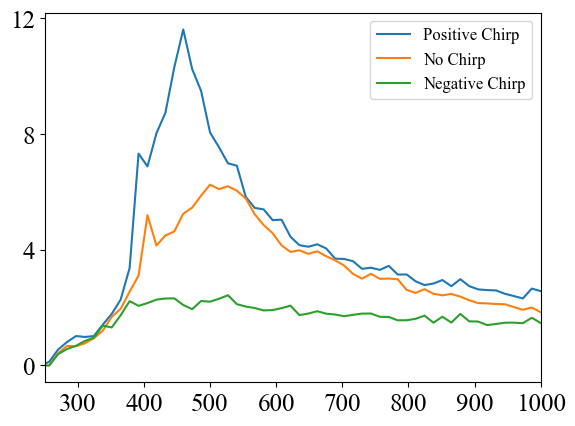

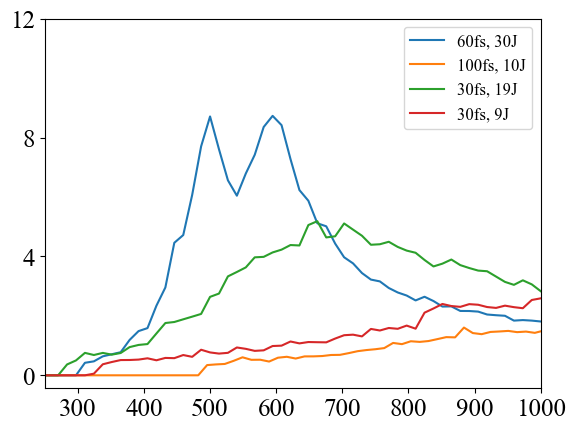

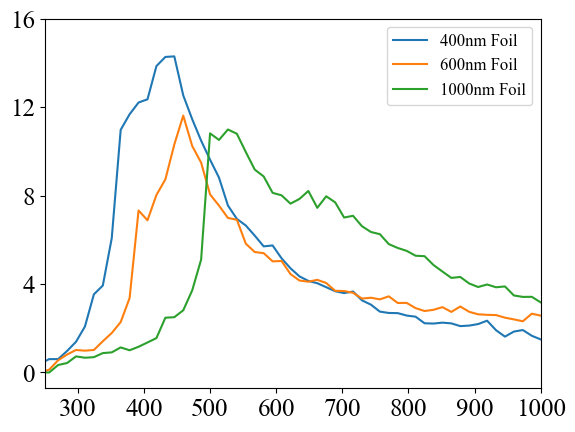

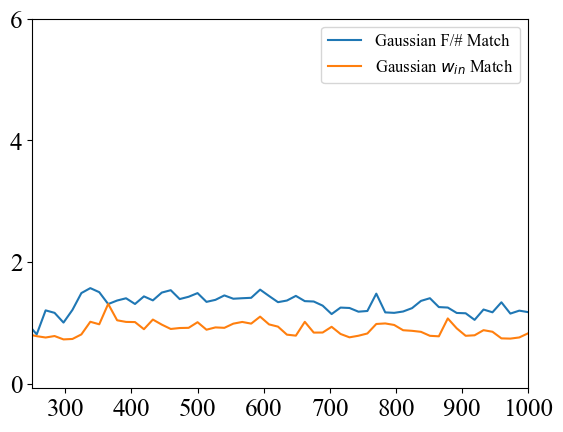

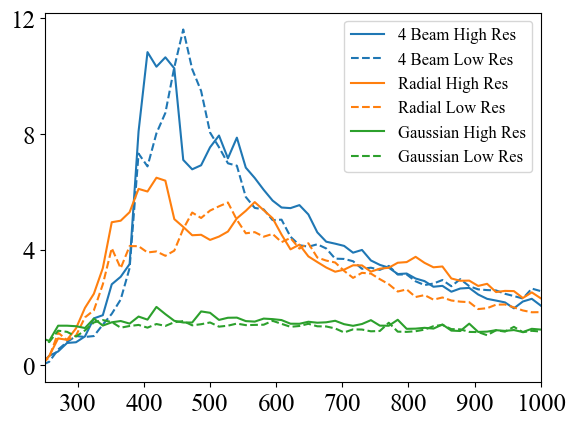

In [21]:
time_vals_density = np.linspace(0, 1000, peak_base_case.shape[0])
time_vals_density_high_res = np.linspace(0, 1000, peak_base_case_high_res.shape[0])

FONT_SIZE = 18
plt.figure()
plt.plot(time_vals_density, peak_base_case, label='Positive Chirp')
plt.plot(time_vals_density, peak_no_chirp, label='No Chirp')
plt.plot(time_vals_density, peak_negative_chirp, label='Negative Chirp')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, 4, 8, 12])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals_density, peak_60fs, label='60fs, 30J')
time_vals_density_1500 = np.linspace(0, 1500, peak_100fs10j.shape[0])
plt.plot(time_vals_density_1500, peak_100fs10j, label='100fs, 10J')
plt.plot(time_vals_density, peak_19j, label='30fs, 19J')
plt.plot(time_vals_density, peak_9j, label='30fs, 9J')

xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, 4, 8, 12])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals_density, peak_400nm, label='400nm Foil')
plt.plot(time_vals_density, peak_base_case, label='600nm Foil')
plt.plot(time_vals_density, peak_1um, label='1000nm Foil')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, 4, 8, 12, 16])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals_density, peak_g_ap_match, label='Gaussian F/# Match')
plt.plot(time_vals_density, peak_gaussian, label='Gaussian $w_{in}$ Match')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, 2, 4, 6])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)

plt.figure()
plt.plot(time_vals_density_high_res, peak_base_case_high_res, color='tab:blue', label='4 Beam High Res')
plt.plot(time_vals_density, peak_base_case, color='tab:blue', linestyle='--', label='4 Beam Low Res')

plt.plot(time_vals_density_high_res, peak_radial_high_res, color='tab:orange', label='Radial High Res')
plt.plot(time_vals_density, peak_radial, color='tab:orange', linestyle='--', label='Radial Low Res')

plt.plot(time_vals_density_high_res, peak_g_ap_match_high_res, color='tab:green', label='Gaussian High Res')
plt.plot(time_vals_density, peak_g_ap_match, color='tab:green', linestyle='--', label='Gaussian Low Res')
xticks = np.array([300, 400, 500, 600, 700, 800, 900, 1000])
yticks = np.array([0, 4, 8, 12])
plt.xticks(xticks, fontsize=FONT_SIZE)
plt.yticks(yticks, fontsize=FONT_SIZE)
plt.xlim(250, 1000)
plt.legend(fontsize=12)